<a href="https://colab.research.google.com/github/Subhasree456/auto-grading-system/blob/main/Student_Performance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams

First 5 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Statistical Summary:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Average Scores by Gender:


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203



Average Scores by Lunch Type:


,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256



Average Scores by Test Preparation Course:


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


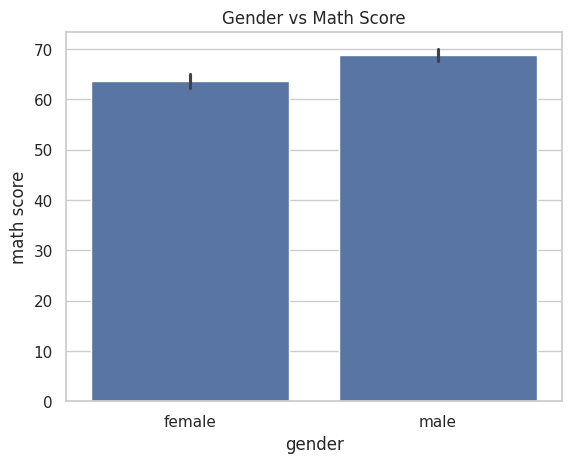

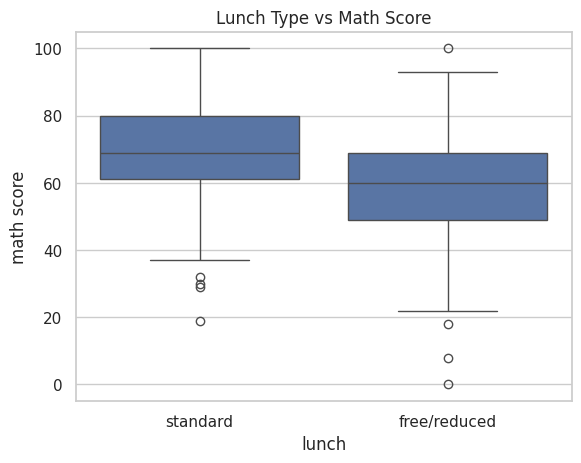

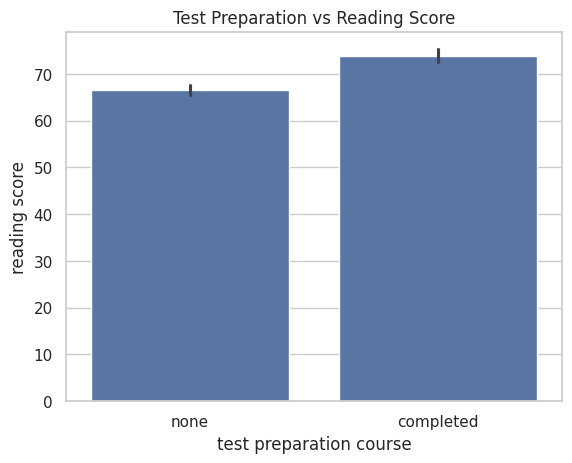

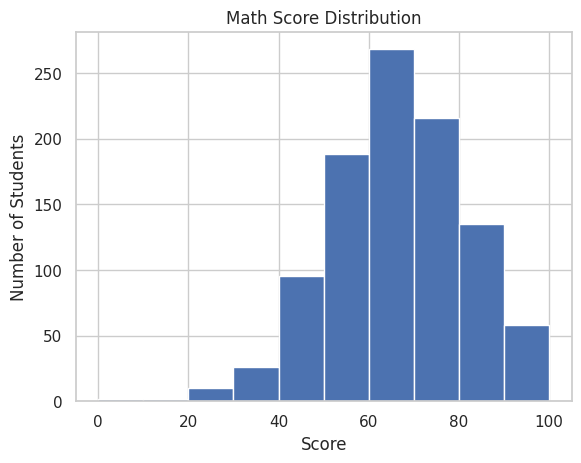


KEY INSIGHTS:
1. Students who completed the test preparation course scored higher in reading and writing.
2. Students with standard lunch performed better on average.
3. Female students scored higher in reading and writing.
4. Math scores are approximately normally distributed.
5. External factors like lunch and preparation influence performance.


In [3]:
# STUDENT PERFORMANCE EDA

# Step 1: Install required libraries
!pip install kagglehub pandas matplotlib seaborn

# Step 2: Importing the  libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 3: Download dataset using kagglehub
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Step 4: to Find CSV file automatically
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)

# Step 5: Load dataset
df = pd.read_csv(csv_file)

# Step 6: Preview dataset
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

# Step 7: Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 8: Grouped Analysis
print("\nAverage Scores by Gender:")
display(df.groupby('gender')[['math score','reading score','writing score']].mean())

print("\nAverage Scores by Lunch Type:")
display(df.groupby('lunch')[['math score','reading score','writing score']].mean())

print("\nAverage Scores by Test Preparation Course:")
display(df.groupby('test preparation course')[['math score','reading score','writing score']].mean())

# Step 9: Visualizations
sns.set(style="whitegrid")

plt.figure()
sns.barplot(x='gender', y='math score', data=df)
plt.title('Gender vs Math Score')
plt.show()

plt.figure()
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Lunch Type vs Math Score')
plt.show()

plt.figure()
sns.barplot(x='test preparation course', y='reading score', data=df)
plt.title('Test Preparation vs Reading Score')
plt.show()

plt.figure()
plt.hist(df['math score'], bins=10)
plt.title('Math Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.show()

# Step 10: Insights
print("\nKEY INSIGHTS:")
print("1. Students who completed the test preparation course scored higher in reading and writing.")
print("2. Students with standard lunch performed better on average.")
print("3. Female students scored higher in reading and writing.")
print("4. Math scores are approximately normally distributed.")
print("5. External factors like lunch and preparation influence performance.")
